# k-means Clustering

## Table of contents

[1.) Simple k-means clustering example](#section_1)<br>
[2.) Image segmentation](#section_2)<br>
[3.) 3D point cloud segmentation](#section_3)<br>
[4.) Finding clusters in the apartment data](#section_4)

## Libraries and settings

In [131]:
# Install opencv-python-headless (neccessary in GitHub Codespaces)
# %pip install --upgrade pip
# %pip install opencv-python-headless

# Libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Current working directory
print('\nCurrent working directory:', os.getcwd())


Current working directory: c:\Users\Jasmin\Desktop\DA\data_analytics\Week_10


## 1.) Simple k-means clustering example
<a id='section_1'></a>

### Create the dataset

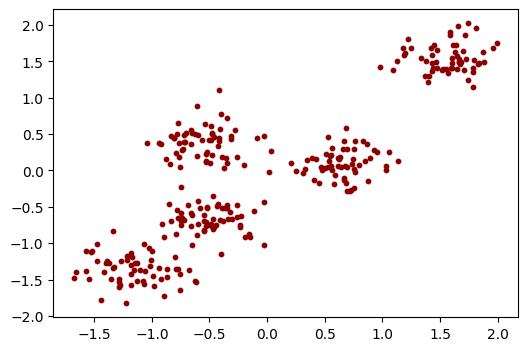

In [132]:
# Create data
centers = [[2,1], [-2,2], [-2,-2], [-4,-5], [5,7]]
X, y = make_blobs(n_samples=300, 
                  centers=centers, 
                  cluster_std=0.8,
                  random_state=42)

# Normalization of the values
X = StandardScaler().fit_transform(X)

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], s=10, color='darkred')
plt.show()

### Elbow Method showing the optimal k

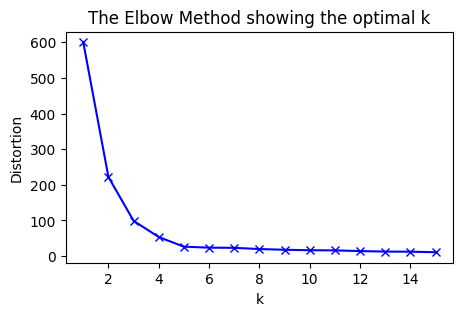

In [133]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(1,16,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

**In the Jupyter notebook, based on the elbow chart, state which 
is the optimal value of k for this clustering model.**

Based on the Elbow Method chart you have provided, the optimal value of 
k

k is the point where the "elbow" occurs, which is where the distortion (sum of squared distances) sharply decreases and then starts to level off.

In the chart:

- The elbow is at k=3.

- This indicates that 3 clusters are likely the optimal number for the k-means clustering model.


### Perform k-means clustering

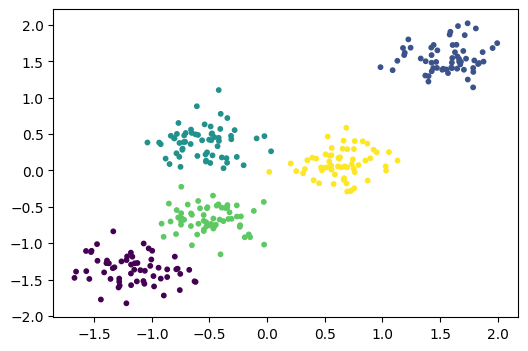

In [134]:
# Number of clusters
k = 5

# k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Predict the values
y2 = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y2, s=10)
plt.show()

### Get and check the converged cluster centroids

In [135]:
# Print centroids
centroids = kmeans.cluster_centers_
print('Cluster centroids:')
print(centroids, '\n')

# Check the 1st cluster's centroid 'by hand'
clust_00 = X[y2 == 0]
print('The 1st cluster\'s centroid:')
print(f'x = {sum(clust_00[:,0]/len(clust_00[:,0])):.8f}')
print(f'y = {sum(clust_00[:,1]/len(clust_00[:,1])):.8f}')

Cluster centroids:
[[-1.16214999 -1.36217282]
 [ 1.56276666  1.54186443]
 [-0.55467879  0.3889481 ]
 [-0.49867406 -0.67040574]
 [ 0.64167824  0.09023659]] 

The 1st cluster's centroid:
x = -1.16214999
y = -1.36217282


### Get the inertia or 'within-cluster sum-of-squares (WCSS)' of the k-means model

In [136]:
print(f'Within-cluster sum-of-squares: {kmeans.inertia_:.4f}')

Within-cluster sum-of-squares: 26.3487


### Perform Silhouette Analysis
- For examples see:
- https://laid-back-scientist.com/en/k-means
- https://machinelearninggeek.com/evaluating-clustering-methods
- https://medium.com/@favourphilic/how-to-interpret-silhouette-plot-for-k-means-clustering-414e144a17fe

k=2, Silhouette Score: 0.5325


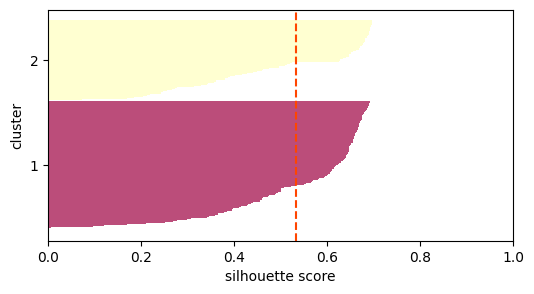

k=3, Silhouette Score: 0.5659


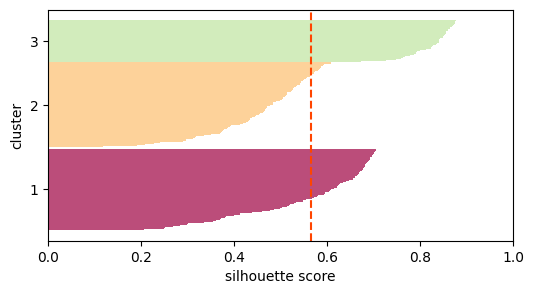

k=4, Silhouette Score: 0.6257


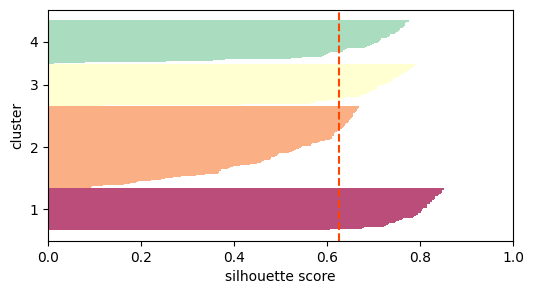

k=5, Silhouette Score: 0.6597


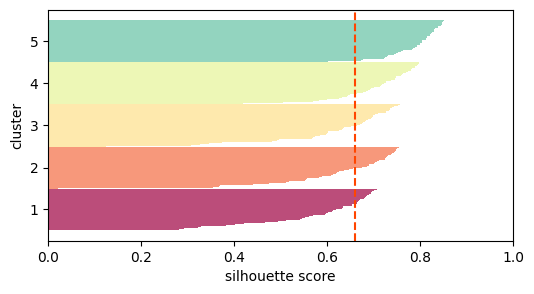

k=6, Silhouette Score: 0.6110


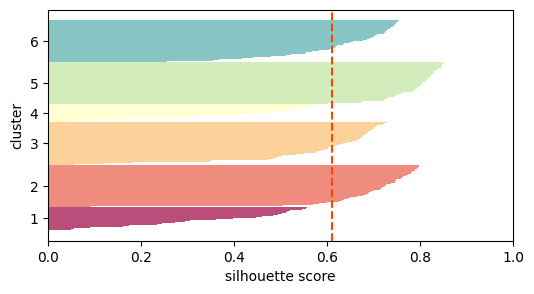

k=7, Silhouette Score: 0.5223


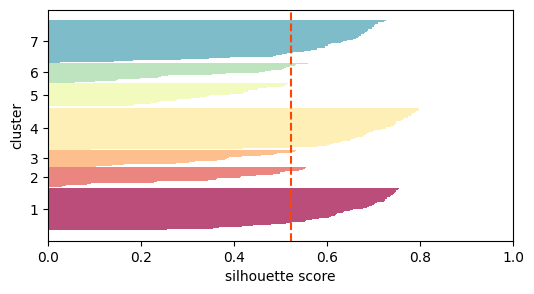

k=8, Silhouette Score: 0.4926


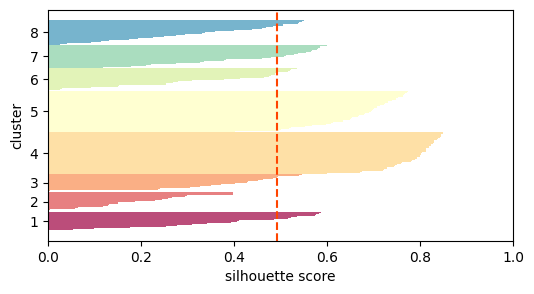

k=9, Silhouette Score: 0.4076


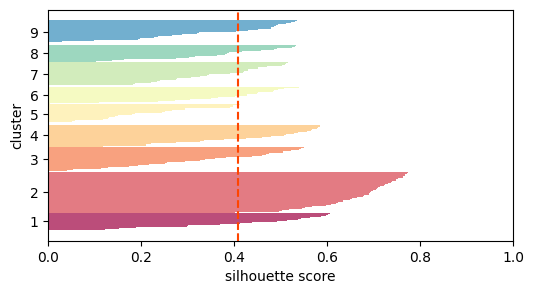

k=10, Silhouette Score: 0.4020


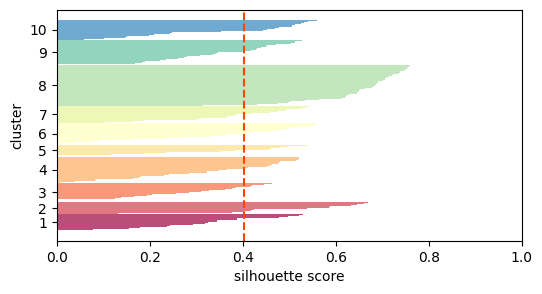

k=11, Silhouette Score: 0.3349


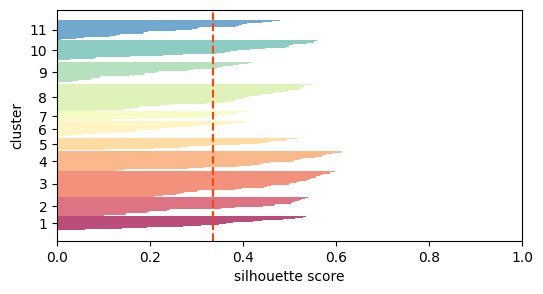

In [137]:
# Import own module for Silhouette plots
from silhouette import *

# Create Silhouette plots for different k's
# Note: range(2,12,1) provides: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for i in range(2,12,1):
    model = KMeans(n_clusters=i, 
                   random_state=42, 
                   init='random')
    model.fit(X)
    print(f'k={i}, Silhouette Score: {silhouette_score(X, model.labels_):.4f}')
    plt.figure(figsize=(6,3))
    show_silhouette(X=X, fitted_model=model)

## 2.) Image segmentation
<a id='section_2'></a>

### Read the image

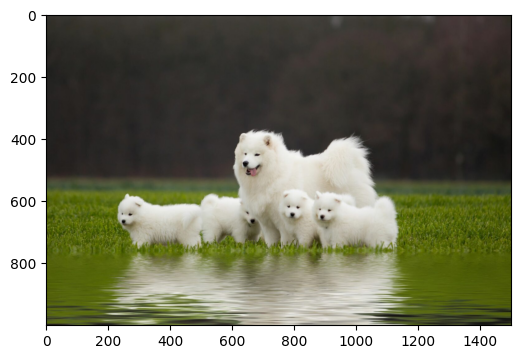

In [138]:
# Read the image
image = cv2.imread('samojede-welpen.jpg')
 
# Change the color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
plt.figure(figsize=(6,8))
plt.imshow(image)

### Reshape the image

In [139]:
# Reshaping the image into a 2D array of pixels and RGB colors
pixel_vals = image.reshape((-1,3))
 
# Convert to float
pixel_vals = np.float32(pixel_vals)
pixel_vals

array([[60., 55., 51.],
       [60., 55., 51.],
       [59., 54., 50.],
       ...,
       [73., 85., 19.],
       [73., 85., 19.],
       [73., 85., 19.]], dtype=float32)

### Elbow method showing the optimal k

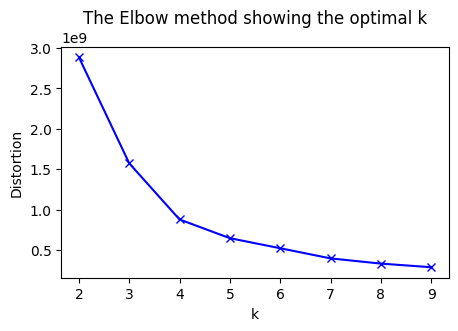

In [140]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(2,10,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pixel_vals)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow method showing the optimal k')

plt.show()

**Use the elbow method to determine the optimal number of clusters k for the 
segmentation of your image**

n the chart:

The elbow is at k=4.
This indicates that 4 clusters are likely the optimal number for the k-means clustering model.

### Perform image segmentation

In [141]:
# Criteria for k-means algorithm to stop
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Dictionary to store segmented images
segmented_images = {}

# Range of cluster values to test
k_values = range(2, 7)  # For example, testing k=2 to k=6

for k in k_values:
    # Perform k-means clustering
    retval, labels, centers = cv2.kmeans(pixel_vals, 
                                         k, 
                                         None, 
                                         criteria, 
                                         10, 
                                         cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    
    # Reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    
    # Store the segmented image in the dictionary
    segmented_images[k] = segmented_image

print("Segmentation complete. You can now plot the results in a separate block.")



Segmentation complete. You can now plot the results in a separate block.


### visualization

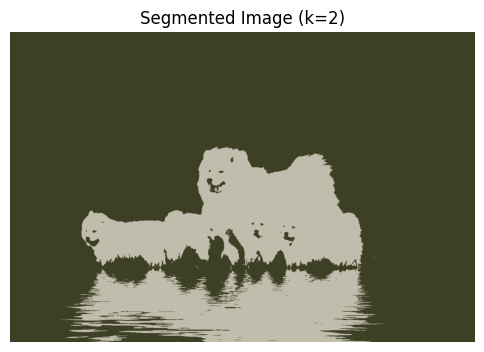

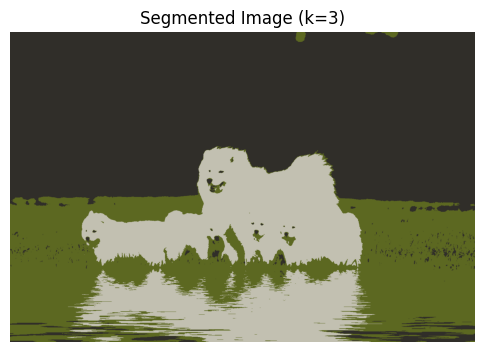

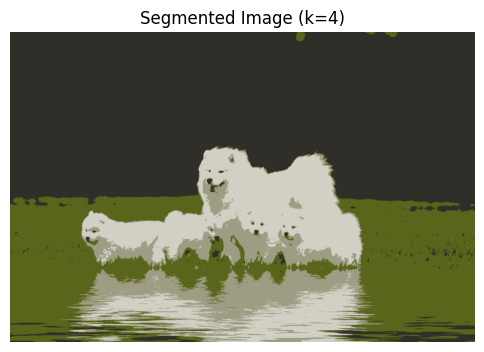

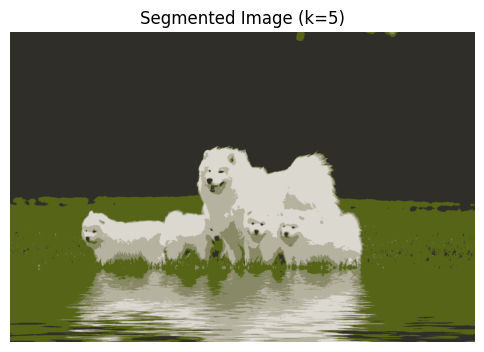

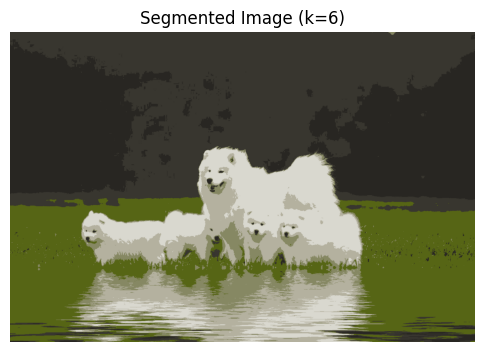

In [142]:
# Plot segmented images stored in the dictionary
for k, segmented_image in segmented_images.items():
    plt.figure(figsize=(6, 8))
    plt.imshow(segmented_image)
    plt.title(f"Segmented Image (k={k})")
    plt.axis('off')
    plt.show()


## 3.) 3D point cloud segmentation
- For details see: https://towardsdatascience.com/3d-point-cloud-clustering-tutorial-with-k-means-and-python-c870089f3af8
- Data-Viewer: https://app.flyvast.com/flyvast/app/page-snapshot-viewer.html#/444/9b557b91-8f41-16fa-cd2d-3476a1756611
<a id='section_3'></a>

### Import the data (Airport LIDAR point cloud dataset)

In [143]:
# Import the data
data = "KME_planes.xyz"
x, y, z, illuminance, reflectance, intensity, nb_of_returns = np.loadtxt(data,
                                                                         skiprows=1, 
                                                                         delimiter=';', 
                                                                         unpack=True)
# Array with positions of points
pcd = np.column_stack((x,y,z))

# Mean of z-variable (height above ground)
print(np.mean(z).round(4))

# Subset of the point cloud 
mask = (z > np.mean(z)) & (x <= 320) & (x >= 230)
spatial_query = pcd[mask]
spatial_query.shape

5.2829


(9676, 3)

### 3D plot of the point cloud subset

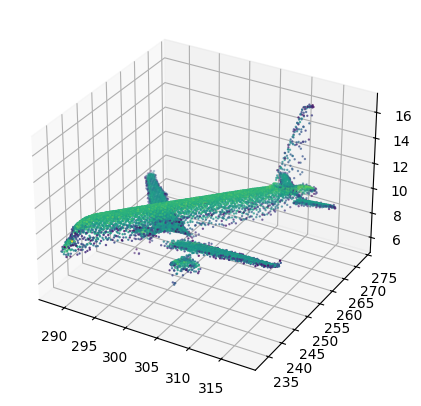

In [144]:
# 3D plot of the subset
plt.figure(figsize=(5,5))
ax = plt.axes(projection ='3d')
ax.scatter(x[mask], y[mask], z[mask], c=intensity[mask], s=0.5)
plt.show()

### 2D plot of the point cloud subset

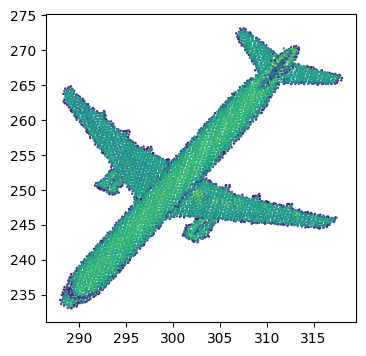

In [145]:
# 2D plot of the subset
plt.figure(figsize=(4,4))
plt.scatter(x[mask], y[mask], c=intensity[mask], s=0.5)
plt.show()

### Elbow method showing the optimal k

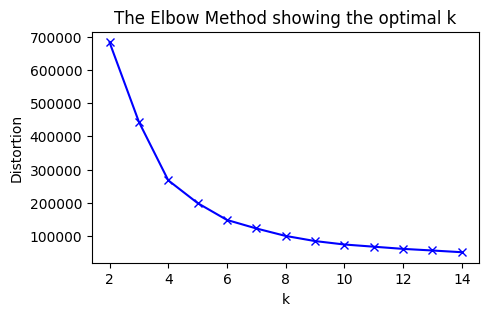

In [146]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(2,15,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(spatial_query)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

### Point cloud segmentation based on k-means clustering

In [147]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Dictionary to store clustering results
kmeans_results = {}

for k in range(2, 6):
    # Stack with x, y, z values
    X2 = np.column_stack((x[mask], y[mask], z[mask]))
    
    # Perform k-means clustering
    kmeans_aerpl = KMeans(n_clusters=k, random_state=42).fit(X2)
    
    # Store clustering results for each k
    kmeans_results[k] = {
        'kmeans_model': kmeans_aerpl,
        'labels': kmeans_aerpl.labels_,
        'centroids': kmeans_aerpl.cluster_centers_
    }
    
    # Optional: Log results for each k
    print(f"Clustering complete for k={k}")

def plot_segmentation(k, x, y, mask, kmeans_results):
    """Plot 2D segmentation for a given k."""
    if k not in kmeans_results:
        print(f"Error: Results for k={k} not found.")
        return
    
    # Extract labels for the given k
    labels = kmeans_results[k]['labels']
    
    # Create the scatter plot
    plt.figure(figsize=(4, 4))
    plt.scatter(x[mask], y[mask], c=labels, s=0.1, cmap='viridis')
    plt.title(f"2D Segmentation with k={k}")
    plt.axis('off')
    plt.show()


def plot_3d_segmentation(k, x, y, z, mask, kmeans_results):
    """Plot 3D segmentation for a given k."""
    if k not in kmeans_results:
        print(f"Error: Results for k={k} not found.")
        return
    
    # Extract labels for the given k
    labels = kmeans_results[k]['labels']
    
    # Create the 3D scatter plot
    plt.figure(figsize=(6, 6))
    ax = plt.axes(projection='3d')
    ax.scatter(x[mask], y[mask], z[mask], c=labels, s=0.1, cmap='viridis')
    ax.set_title(f"3D Segmentation with k={k}")
    plt.show()


Clustering complete for k=2
Clustering complete for k=3
Clustering complete for k=4
Clustering complete for k=5


### 2D plot of the segmented point cloud

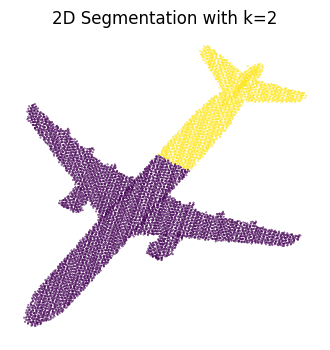

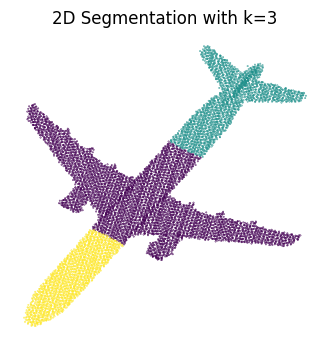

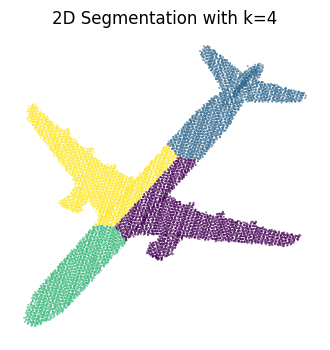

In [148]:
plot_segmentation(2, x, y, mask, kmeans_results)  # Plot for k=2
plot_segmentation(3, x, y, mask, kmeans_results)  # Plot for k=3
plot_segmentation(4, x, y, mask, kmeans_results)  # Plot for k=4


### 3D plot of the segmented point cloud

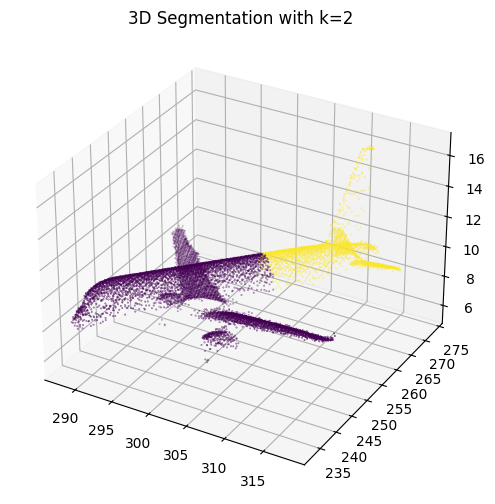

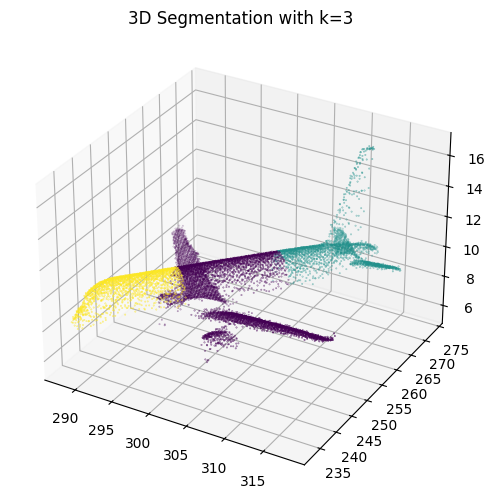

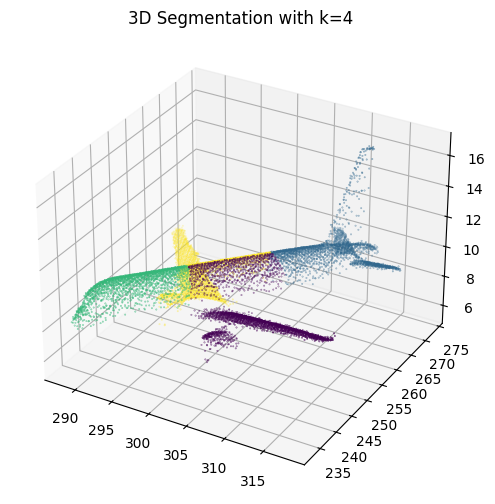

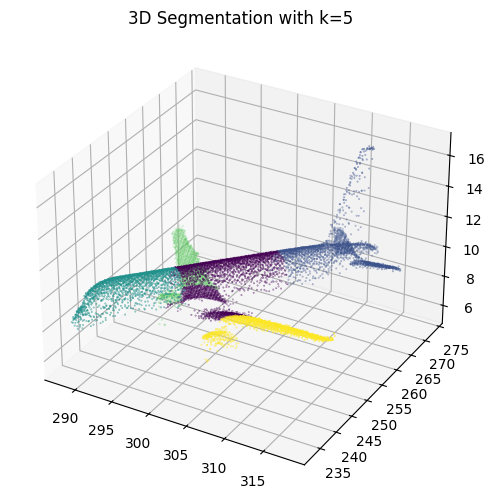

In [149]:
# 3D plot of image segmentation
plot_3d_segmentation(2, x, y, z, mask, kmeans_results)  # Plot for k=2
plot_3d_segmentation(3, x, y, z, mask, kmeans_results)  # Plot for k=3
plot_3d_segmentation(4, x, y, z, mask, kmeans_results)  # Plot for k=4
plot_3d_segmentation(5, x, y, z, mask, kmeans_results)  # Plot for k=5


### Observations:

**k=2:**

The data is divided into two broad segments, likely separating the main structure of the airplane (e.g., fuselage) from other parts (e.g., wings or background).
This segmentation is coarse and may miss finer details in the structure.

**k=3:**

Introducing a third cluster allows finer segmentation, better distinguishing between different parts of the airplane.
For instance, parts like the wings and fuselage may start to separate more clearly.

**k=4:**

With four clusters, segmentation becomes even more detailed.
Smaller, more specific regions, such as the tail, wings, or parts of the background, might now be distinctly identified.

**k=5:**

The segmentation captures more distinct parts of the airplane. For example, the wings, fuselage, tail, and perhaps landing gear or nearby background elements are now clearly separated into individual clusters.


### Calculate the Silhouette Score

In [150]:
print(f'Silhouette Score: {silhouette_score(X2, kmeans_aerpl.labels_):.4f}')

Silhouette Score: 0.4704


## 4.) Finding clusters in the apartment data
<a id='section_4'></a>

### Import the apartment data

In [151]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'mean_taxable_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched_cleaned.csv", sep=";", encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

print(df.shape)
df.head(5)

(722, 17)


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49,0,1441,29.41,47.252171,8.845797,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",3.0,111,0,2600,23.42,47.252087,8.854919,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",3.0,58,0,1490,25.69,47.253670,8.853993,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",4.0,118,0,3240,27.46,47.259834,8.851705,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",3.0,66,0,1450,21.97,47.266113,8.866872,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,974.844209


### Subset of the apartment data frame for k-means clustering

In [187]:
# Define a subset of the data frame for k-means clustering
X3 = df[['rooms',
         'area',
         'price_per_m2',
         'pop_dens',
         'lat',
         'lon',]]

### Elbow method showing the optimal k

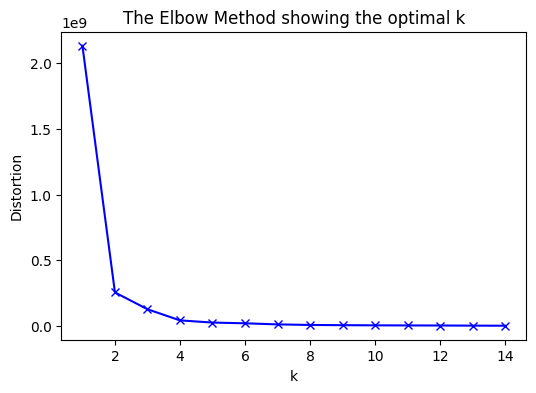

In [191]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(1,15)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X3)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(6,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

**Optimal k:**
- The elbow appears around k=3, as the rate of distortion reduction slows down significantly after this point.

**why not k=2?**
- The drop from k=2 to k=3 is smaller but still noticeable.

### Perform k-means clustering on the apartment data

In [193]:
# Number of clusters
k = 3

# Perform k-means clustering
kmeans_apmts = KMeans(n_clusters=k, random_state=42).fit(X3)

# Add the clusters to data frame
X3['cluster'] = kmeans_apmts.labels_

# Show number of apartments per cluster
X3['cluster'].value_counts().sort_values(ascending=False)

cluster
0    273
1    239
2    210
Name: count, dtype: int64

### Plot the apartment clusters

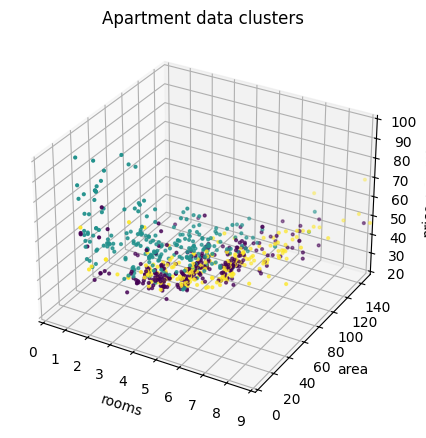

In [194]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['rooms'], df['area'], df['price_per_m2'], c=kmeans_apmts.labels_, s=4)

# Set title and axes labels
ax.set_title('Apartment data clusters', fontsize=12)
ax.set_xlabel('rooms', fontsize=10)
ax.set_ylabel('area', fontsize=10)
ax.set_zlabel('price_per_m2', fontsize=10)

# Set axes range
ax.set_xlim([0,9])
ax.set_ylim([0,150])
ax.set_zlim([20,100])

plt.show()

### Calculate the Silhouette Score

In [174]:
print(f'Silhouette Score: {silhouette_score(X3, kmeans_apmts.labels_):.4f}')

Silhouette Score: 0.4547


In [195]:
# Print k-means attributes
print("Cluster labels:")
print(kmeans_apmts.labels_, '\n')

print("Inertia:")
print(kmeans_apmts.inertia_, '\n')

print("Cluster centers:")
print(kmeans_apmts.cluster_centers_, '\n')

# Feature names are available in sklearn 1.0+
try:
    print("Feature names used in clustering:")
    print(kmeans_apmts.feature_names_in_, '\n')
except AttributeError:
    print("Feature names are not available in your sklearn version.")


Cluster labels:
[0 0 0 0 0 0 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 2 2 2 1 1 1 1 1 1 1 1 2 2 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 

**f) Explain the Output**

- **cluster_centers_:** Represents the average values for each feature in the clusters. For example, a cluster might represent apartments with 3 rooms, 80m² area, and a price of $2000/m².

- **labels_:** Indicates the cluster each apartment belongs to, enabling grouping of similar apartments.

- **inertia_:** Reflects the compactness of clusters, with lower values indicating tighter grouping. Used in the elbow method to choose the best k.

- **n_iter_:** Confirms the number of iterations the algorithm took to converge, ensuring a stable result.

- **feature_names_in_:** Lists the input features, confirming that the variables (e.g., rooms, area, pop_dens, etc.) were included in the clustering.

Silhouette Score for k=2: 0.7984999039492167
Silhouette Score for k=3: 0.676534167564198
Silhouette Score for k=4: 0.7400819373752223
Silhouette Score for k=5: 0.7086897045930123
Silhouette Score for k=6: 0.7061939796316751
Silhouette Score for k=7: 0.6915642803805591
Silhouette Score for k=8: 0.711756382369779
Silhouette Score for k=9: 0.6963020308710076
Silhouette Score for k=10: 0.6841254567793643
Silhouette Score for k=11: 0.702616819146826
Silhouette Score for k=12: 0.7046680885387033
Silhouette Score for k=13: 0.7015719179583859
Silhouette Score for k=14: 0.7092242186217828


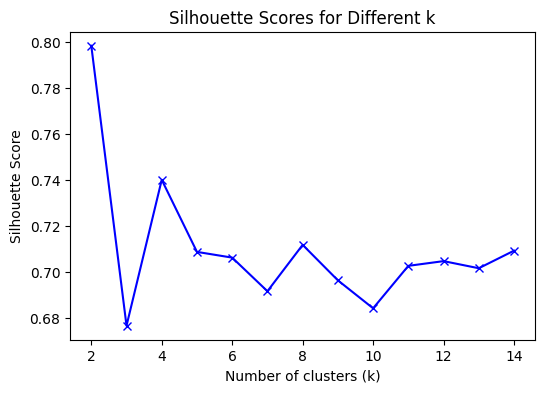

In [198]:
from sklearn.metrics import silhouette_score

# Range of k values to test
k_values = range(2, 15)
silhouette_scores = []

# Calculate Silhouette Scores for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X3)
    score = silhouette_score(X3, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score}")

# Plot Silhouette Scores
plt.figure(figsize=(6, 4))
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()


### Explanation:
**Silhouette Score:**
Measures how similar a data point is to its own cluster compared to other clusters.
Ranges between −1 and 1
- 1: Perfect clustering (data points are well matched to their own cluster and poorly matched to others).

- 0: Overlapping clusters.

- Negative: Misclassified clusters.

**Output:**
The plot shows the Silhouette Scores for each k. Look for the highest score, which suggests the optimal k.

### Compare with Elbow Method:

- The Silhouette Score is highest for k=2 with a value around 0.8, suggesting that two clusters provide the best separation between data points.

- The scores decrease for k=3 and beyond but remain relatively stable around 0.70-0.74 for larger k.

**Conclusion**
- While the elbow method suggests k=3, the Silhouette Score for k=2 indicates better-defined clusters.

- If the goal is to maximize clustering quality (based on the Silhouette Score), k=2 should be chosen.

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [157]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-12-09 11:54:27
Python Version: 3.12.0
-----------------------------------
